In [1]:
from definitions import ROOT_DIR
%cd $ROOT_DIR
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from copy import copy

print("Dopasowujemy model surogatowy nauczony dla pacjenta EP1 (patient202205141015) do danych dla pacjenta EP2 (patient202205170854)")
USE_REAL_TIME = True

/home/x/doc/dev/master/CancerTherapyPrediction
Dopasowujemy model surogatowy nauczony dla pacjenta EP1 (patient202205141015) do danych dla pacjenta EP2 (patient202205170854)


In [ ]:
maximal ={'P0': 142730, 'C0': 3.1350094623894074, 'gamma_p': 0.0002899885604836935, 'KDE': 0.0004971029545181719, 'K': 424354.54431511427, 'eta': 0.2999968345615772, 'alpha': 5.000000000208709e-06, 'alpha_diff': 15.000000002287718, 'lambda_p': 7.500000001456923e-05}


params = maximal
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
from data.klusek.EP2.config import threatment_start, threatment_end,threatment2_start
from asymilacja.model.utils_linsp import GS5

threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/EP2/stats0.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration']<=threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)
params['P0'] = df_true.loc[threatment_start,"prolif_cells"]

  # Training12_GS3.py

In [15]:
def show_param_change(params1, parameterName, range):
    for i in range:
        params1[parameterName] = i
        lineLabel = None
        if i == range[0] or i==range[-1]:
            lineLabel = i
        plot_parameters(GS5,params1,steps_forward,steps_backward,threatment_start,None,USE_REAL_TIME,t_real,lineLabel=lineLabel)

    plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

    plt.title(f"Zmieniamy zmienną {parameterName}")
    # plt.legend()
    plt.show()

# Training13_GS5.py

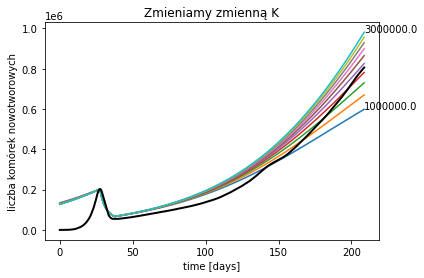

In [16]:
params1 = copy(params)

mln=1000000
range =np.linspace(1.0*mln,3*mln,10)
show_param_change(params1, 'K', range)

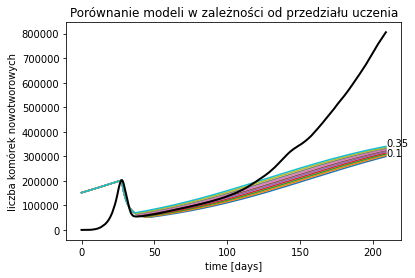

In [3]:
params1 = copy(params)

range = np.linspace(0.1,0.35,10)
for i in range:
    params1['eta'] = i
    lineLabel = None
    if i == range[0] or i==range[-1]:
        lineLabel = i
    plot_parameters(GS5,params1,steps_forward,steps_backward,threatment_start,None,USE_REAL_TIME,t_real,lineLabel=lineLabel)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Porównanie modeli w zależności od przedziału uczenia")
plt.show()

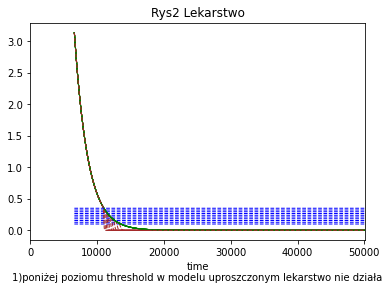

In [4]:
params1 = copy(params)
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_curement
steps_forward=threatment2_start-threatment_start

range =np.linspace(0.1,0.35,10)
for i in range:
    params1['eta'] = i
    lineLabel = None
    if i == range[0] or i==range[-1]:
        lineLabel = i
    plot_curement(GS5,params1,steps_forward,threatment_start,params_eta=None)

plt.show()

9.09941214460779
9.09941214460779


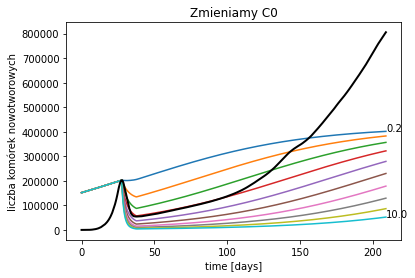

In [5]:
from scipy.integrate import odeint

params1 = copy(params)
# params1['KDE'] = 100
# params1['eta'] = 0.2
params1['eta'] =0.299999
params1['KDE'] = -np.log(params1['eta']/(threatment_time+200))
print(params1['KDE'] )
print(params1['KDE'] )
params1['KDE'] = 0.0005

range = np.linspace(0.2,10,10)
for i in range:
    params1['C0'] = i
    lineLabel = None
    if i == range[0] or i==range[-1]:
        lineLabel = i
    plot_parameters(GS5,params1,steps_forward,steps_backward,threatment_start,None,USE_REAL_TIME,t_real,lineLabel=lineLabel)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy C0")
plt.show()

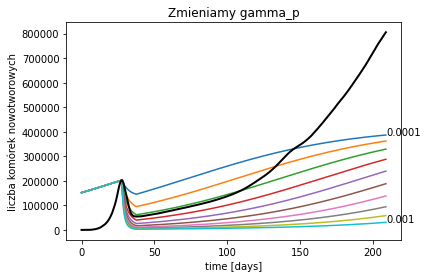

In [6]:


# params1['KDE'] = np.log(params1['eta']/threatment_time+200)
range =np.linspace(0.0001,0.001,10)
for i in range:
    params1 = copy(params)
    params1['gamma_p'] = i
    lineLabel = None
    if i == range[0] or i==range[-1]:
        lineLabel = i
    plot_parameters(GS5,params1,steps_forward,steps_backward,threatment_start,None,USE_REAL_TIME,t_real,lineLabel=lineLabel)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy gamma_p")
plt.show()
# wniosek trzeba dopasować koniec terapii, czyli KDE

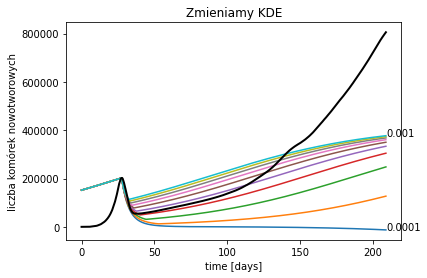

In [7]:
params1 = copy(params)


mln=1000000
range = np.linspace(0.0001,0.001,10)
for i in range:
    params1['KDE'] = i
    lineLabel = None
    if i == range[0] or i==range[-1]:
        lineLabel = i
    plot_parameters(GS5,params1,steps_forward,steps_backward,threatment_start,None,USE_REAL_TIME,t_real,lineLabel=lineLabel)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy KDE")
plt.show()

# Training15_GS1
dPdt = lambda_p * P*(1-P/K) - gamma_p * unit_step_fun(C,eta)  * P

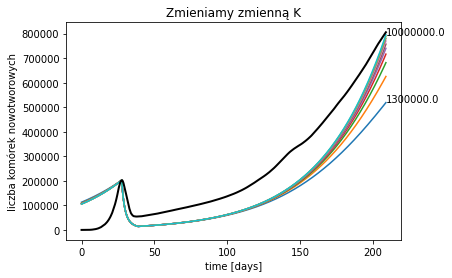

In [8]:
maximal ={'P0': 1578183, 'C0': 9.580054434387815, 'gamma_p': 0.00020043448148424222, 'K': 1800009.8388459147, 'eta': 0.2821441111244175, 'KDE': 0.00047284652698822814, 'lambda_p': 0.00010037182386318592}
params = maximal

from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
from data.klusek.EP2.config import threatment_start, threatment_end,threatment2_start
from asymilacja.model.utils_linsp import GS1


threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/EP2/stats0.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration']<=threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)
params['P0'] = df_true.loc[threatment_start,"prolif_cells"]

params1 = copy(params)

mln=1000000
range = np.linspace(1.3*mln,10*mln,10)
for i in range:
    params1['K'] = i
    lineLabel = None
    if i == range[0] or i==range[-1]:
        lineLabel = i
    plot_parameters(GS1,params1,steps_forward,steps_backward,threatment_start,None,USE_REAL_TIME,t_real,lineLabel=lineLabel)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy zmienną K")
# plt.legend()
plt.show()

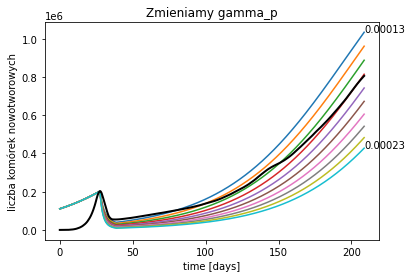

In [9]:
params1 = copy(params)
range = np.linspace(0.00013,0.00023,10)
for i in range:
    params1 = copy(params)
    params1['gamma_p'] = i
    lineLabel = None
    if i == range[0] or i==range[-1]:
        lineLabel = i
    plot_parameters(GS1,params1,steps_forward,steps_backward,threatment_start,None,USE_REAL_TIME,t_real,lineLabel=lineLabel)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy gamma_p")
plt.show()

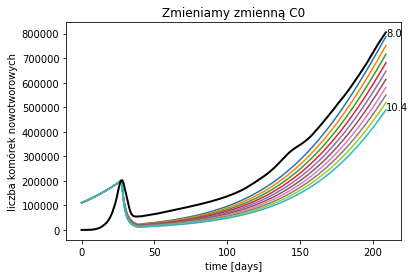

In [10]:
params1 = copy(params)
range =np.linspace(8,10.4,10)
for i in range:
    params1['C0'] = i
    lineLabel = None
    if i == range[0] or i==range[-1]:
        lineLabel = i
    plot_parameters(GS1,params1,steps_forward,steps_backward,threatment_start,None,USE_REAL_TIME,t_real,lineLabel=lineLabel)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)

plt.title("Zmieniamy zmienną C0")
plt.show()

# Training16_GS4.py